# Introduction

This Jupyter notebook is a tool used to build a free and open-source algorithm for betting on tennis matches. The algorithm will ideally be able to predict the outcomes of singles matches in ATP, WTA, and the ATP Challenger Series. More information available in the [GitHub repo](https://github.com/nschimmoller/model-card-tennis)

Most of the code and data used for this project has been sourced from two places:

- [Tennis-Betting-ML Code written by GitHub user BrandonPolistirolo](https://github.com/BrandoPolistirolo/Tennis-Betting-ML) served as the basis for data and model structure along with training.

  - Brandon's model was based on a dataset from Kaggle called [Large Tennis Dataset for ATP and ITF Betting](https://www.kaggle.com/ehallmar/a-large-tennis-dataset-for-atp-and-itf-betting?select=all_matches.csv). However, this dataset is not being maintained and will eventually need to be supplemented.
- [JeffSackmann's Tennis_ATP GitHub Repo](https://github.com/JeffSackmann/tennis_atp) will be used to supplement the Kaggle Data.

In each section of this notebook, there will be a brief explanation of what the code being executed does. To execute the code, the user should only have to click the "Run" button for each cell.

# Match Ingestion and Processing

## Overview

This code performs several data processing tasks on two datasets related to tennis matches and tournaments. The processed data is then saved as a CSV and a Pickle file, and also as separate CSV files for each tournament.

## Steps
- **Remove old data:** The code removes any tournaments or matches that occurred before the year 2000.
- **Create unique identifiers:** The code creates a unique identifier for each tournament based on the tournament name and year, and adds it as a new column to the tournaments dataset. It also adds a similar column to the matches dataset.
- **Remove doubles matches:** The code removes any matches that were doubles matches.
- **Remove incomplete matches:** The code removes any matches where the number of sets played was not recorded.
- **Merge the matches data with itself:** The code merges the matches dataset with itself to create a new dataset where each row represents a pair of players who played against each other in a match.
- **Rename columns:** The code renames the columns in the merged dataset to indicate which player each column refers to.
- **Save the processed data:** The code saves the processed data as a CSV and a Pickle file.
- **Save tournament data:** The code saves separate CSV files for each tournament.


## Output
The output of the code is a CSV file containing processed data on tennis matches, as well as separate CSV files for each tournament. You can examine the results of this function by reading in either: 'final_kaggle_dataset.csv' or 'final_kaggle_dataset.pkl'; alternatively you can access this data via variable final_dataset, which is a Pandas DataFrame.

In [1]:
%run -i 'Kaggle_Tennis_Data_PreProcessing_ChatGPT.py' ## debug=True

Running in debug mode

Reading in data
	Current Time: 2023-04-27 11:04:03


/Users/nate.schimmoller/opt/anaconda3/lib/python3.9/site-packages/IPython/utils/py3compat.py:168: DtypeWarning: Columns (5,8,10,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(compiler(f.read(), fname, 'exec'), glob, loc)



Removing old tournaments
	Elapsed time since last call: 27.48 seconds

Creating unique tournament_ids
	Elapsed time since last call: 3.23 seconds

Removing Doubles Matches
	Elapsed time since last call: 3.12 seconds

Removing erroneous matches
	Elapsed time since last call: 2.79 seconds

Resetting index
	Elapsed time since last call: 1.21 seconds

Calculating running total matches played
	Elapsed time since last call: 6.69 seconds

Converting victories from t and f to 1 and 0
	Elapsed time since last call: 1.62 seconds

Calculating running total victories
	Elapsed time since last call: 0.82 seconds

Examining running totals to ensure accuracy
	Elapsed time since last call: 0.33 seconds
           player_id             opponent_id  \
999202  hugo-armando       gustavo-marcaccio   
999203  hugo-armando         david-critchley   
999204  hugo-armando           yari-bernardo   
999205  hugo-armando     marc-canovas-martos   
999206  hugo-armando             diego-ayala   
999207  hugo-arm

         player_id_2           opponent_id_2  \
999202  hugo-armando       gustavo-marcaccio   
999203  hugo-armando         david-critchley   
999204  hugo-armando           yari-bernardo   
999205  hugo-armando     marc-canovas-martos   
999206  hugo-armando             diego-ayala   
999207  hugo-armando  luiz-procopio-carvalho   
999208  hugo-armando             diego-ayala   
999209  hugo-armando           pablo-bianchi   
999210  hugo-armando          zack-fleishman   
999211  hugo-armando          zack-fleishman   
999212  hugo-armando           pablo-bianchi   
999213  hugo-armando         oren-motevassel   
999214  hugo-armando             mark-hilton   
999215  hugo-armando         alexander-waske   
999216  hugo-armando         alexander-waske   
999217  hugo-armando        david-nalbandian   
999218  hugo-armando   levar-harper-griffith   
999219  hugo-armando         bjorn-rehnquist   
999220  hugo-armando         michael-russell   
999221  hugo-armando          paul-golds


Save dataframe as pickle
	Elapsed time since last call: 1.74 minutes


# Removing Duplicate Records

## Overview:

This Python code takes in a dataset of tennis match results and removes duplicate rows, before saving the cleaned dataset as a CSV file.

## Steps:

- Load a CSV file called "final_kaggle_dataset.csv"
- Call the "remove_doubles" function on the dataset to remove duplicated rows.
- Save the cleaned dataset as a new CSV file called "final_df.csv".

## Output:

A cleaned CSV file called "final_df.csv" that contains unique tennis match results without any duplicated rows.

In [3]:
%run -i 'Remove Double Matches.py'


Removing duplicate rows
	Elapsed time since last call: 42.89 seconds

Done removing duplicate rows
	Elapsed time since last call: 2.06 minutes


# Player Data Ingestion and Processing

## Overview
This code reads in data about all tennis players and the ATP players from separate csv files, and merges them to create a final player dataset. It then filters out players with missing information, cleans up the player names, and exports the resulting cleaned dataset to two new files: players_data.csv and players_data.pkl.

## Steps
- Read in all player data
- Read in ATP player data
- Add an underscore to player names where missing, and filter out any rows with missing player IDs
- Clean player names by replacing spaces with dashes, joining with surname, and converting to lower case
- Merge cleaned data with original data on player ID, and filter out players with missing date of birth (DOB)
- Format DOB as date, and drop useless columns
- Export cleaned dataset to players_data.csv and players_data.pkl

## Output
- players_data.csv: a csv file containing the cleaned player dataset
- players_data.pkl: a pickle file containing the cleaned player dataset

In [4]:
%run -i 'Players_Data_PreProc.py'


Reading in all player data
	Elapsed time since last call: 2.05 minutes

Reading in atp player_data
	Elapsed time since last call: 0.23 seconds

Add underscore to name
	Elapsed time since last call: 0.21 seconds

Filter out missing player ids
	Elapsed time since last call: 0.21 seconds

Clean player name
	Elapsed time since last call: 0.03 seconds

Join clean and original player data
	Elapsed time since last call: 0.06 seconds

Remove players with missing date of birth (DOB), and format as date
	Elapsed time since last call: 0.14 seconds

Export data to players_data.csv and players_data.pkl
	Elapsed time since last call: 0.04 seconds


# Clean Player Data

## Overview:

This Python code imports two different datasets - matches data and players data - and merges them based on the player ID. After the merge, it filters out players born before 1960 and exports the remaining player data to a CSV file.

## Steps:

- Import match data and player data into separate dataframes
- Convert the date of birth column to a datetime object
- Merge the matches dataframe with the player dataframe on the 'player_id' column
- Filter the resulting dataframe to only include players born after 1960
- Export the filtered player data to a CSV file

## Output:

The final output is a CSV file containing player data for only those players who were born after 1960 and have played matches in the matches dataset.

In [5]:
%run -i 'Players_names_fix_ChatGPT.py'


Importing match data
	Elapsed time since last call: 8.90 seconds

Importing player data
	Elapsed time since last call: 23.89 seconds

Merging match data with player data
	Elapsed time since last call: 0.05 seconds

Removing players born before 1960
	Elapsed time since last call: 0.39 seconds

Saving player data
	Elapsed time since last call: 0.23 seconds


In [ ]:
import pandas as pd

# Read in matches_df dataframe
matches_df = pd.read_csv("final_df.csv", parse_dates=True)

# Assign match_id to each row
matches_df['match_id'] = matches_df.index

# Sort dataframe
matches_df.sort_values('start_date', inplace=True)

# Convert 't' and 'f' to 1 and 0 in player_1_victory and player_2_victory columns
matches_df['player_victory_1'] = matches_df['player_victory_1'].map({'t': 1, 'f': 0})
matches_df['player_victory_2'] = matches_df['player_victory_2'].map({'t': 1, 'f': 0})

# Calculate running total matches and victories played for each player
matches_df['player_running_total_matches_played_1'] = matches_df.groupby('player_id').cumcount() + 1
matches_df['player_running_total_matches_played_2'] = matches_df.groupby('opponent_id').cumcount() + 1
matches_df['player_total_running_victories_1'] = matches_df.groupby('player_id')['player_victory_1'].cumsum()
matches_df['player_total_running_victories_2'] = matches_df.groupby('opponent_id')['player_victory_2'].cumsum()

# Calculate total matches and victories played for each player
total_matches_played = matches_df.groupby('player_id').size().add(matches_df.groupby('opponent_id').size(), fill_value=0)
total_victories = matches_df.groupby('player_id')['player_victory_1'].sum().add(matches_df.groupby('opponent_id')['player_victory_2'].sum(), fill_value=0)
matches_df['player_total_matches_played_1'] = matches_df['player_id'].map(total_matches_played)
matches_df['player_total_matches_played_2'] = matches_df['opponent_id'].map(total_matches_played)
matches_df['player_total_victories_1'] = matches_df['player_id'].map(total_victories)
matches_df['player_total_victories_2'] = matches_df['opponent_id'].map(total_victories)

# Fill in missing values with 0 in relevant columns
matches_df[['player_running_total_matches_played_1', 'player_running_total_matches_played_2']] = matches_df[['player_running_total_matches_played_1', 'player_running_total_matches_played_2']].fillna(0)

# Select the desired columns for the new dataframe
new_df = matches_df[['player_id', 'opponent_id', 'start_date', 'player_victory_1', 'player_victory_2', 
                     'player_running_total_matches_played_1', 'player_running_total_matches_played_2',
                     'player_total_matches_played_1', 'player_total_matches_played_2',
                     'player_total_running_victories_1', 'player_total_running_victories_2',
                     'player_total_victories_1', 'player_total_victories_2']]


In [59]:
new_df.to_csv('running_matches_total.csv', index=False)

In [6]:
calculate_elo = pd.read_csv("final_df.csv", parse_dates=True)

In [4]:
calculate_elo = calculate_elo[['player_id', 'opponent_id', 'start_date', 'player_victory_1', 'player_victory_2', 
                     'running_total_matches_played_1', 'running_total_matches_played_2',
                     'running_total_victories_1', 'running_total_victories_2']]

In [7]:
calculate_elo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123044 entries, 0 to 1123043
Data columns (total 99 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   start_date                              1123044 non-null  object 
 1   end_date                                1123012 non-null  object 
 2   location                                1123044 non-null  object 
 3   court_surface                           1122756 non-null  object 
 4   prize_money                             121694 non-null   float64
 5   currency                                121694 non-null   object 
 6   year                                    1123044 non-null  int64  
 7   player_id                               1123044 non-null  object 
 8   player_name                             88320 non-null    object 
 9   opponent_id                             1123044 non-null  object 
 10  opponent_name                 

In [8]:
import pandas as pd
from typing import Tuple

player_elos = {}

def elo_calc(row: pd.Series, initial_elo=1500, max_elo_diff=800) -> Tuple[float, float]:
    """
    Calculates the new Elo ratings for two players after a match.

    Args:
        row (pd.Series): A pandas Series object containing match data.
        initial_elo (float, optional): The initial Elo rating for a new player. Defaults to 1500.
        max_elo_diff (float, optional): The maximum allowed Elo difference between two players. Defaults to 800.

    Returns:
        Tuple[float, float]: A tuple containing the new Elo ratings for both players.
    """
    player_1 = row['player_id']
    player_2 = row['opponent_id']
    elo_1 = player_elos.get(player_1, initial_elo)
    elo_2 = player_elos.get(player_2, initial_elo)
    w_1 = row['running_total_victories_1']
    w_2 = row['running_total_victories_2']
    m_1 = row['running_total_matches_played_1']
    m_2 = row['running_total_matches_played_2']

    elo_diff = min(max(elo_1 - elo_2, -max_elo_diff), max_elo_diff)
    expected_1 = 1 / (1 + 10 ** (elo_diff / 400))
    expected_2 = 1 - expected_1
    decay_1 = 250.0 / ((5 + m_1) ** 0.4)
    decay_2 = 250.0 / ((5 + m_2) ** 0.4)
    new_elo_1 = elo_1 + decay_1 * (w_1 - expected_1)
    new_elo_2 = elo_2 + decay_2 * (w_2 - expected_2)

    player_elos[player_1] = new_elo_1
    player_elos[player_2] = new_elo_2

    return new_elo_1, new_elo_2

def apply_elo(df: pd.DataFrame) -> pd.DataFrame:
    """Apply the Elo calculation to a DataFrame of tennis matches.

    Args:
        df (pandas.DataFrame): A DataFrame containing the player ID, opponent ID,
                               and other match statistics for each tennis match.

    Returns:
        pandas.DataFrame: The input DataFrame with two additional columns, 'elo_1'
                           and 'elo_2', containing the updated Elo ratings for the two players.

    Raises:
        None.
    """
    df['elo_1'], df['elo_2'] = zip(*df.apply(elo_calc, axis=1))
    return df

In [9]:
calculate_elo = apply_elo(calculate_elo)

In [26]:
calculate_elo.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123044 entries, 0 to 1123043
Data columns (total 102 columns):
 #    Column                                  Non-Null Count    Dtype  
---   ------                                  --------------    -----  
 0    start_date                              1123044 non-null  object 
 1    end_date                                1123012 non-null  object 
 2    location                                1123044 non-null  object 
 3    court_surface                           1122756 non-null  object 
 4    prize_money                             121694 non-null   float64
 5    currency                                121694 non-null   object 
 6    year                                    1123044 non-null  int64  
 7    player_id                               1123044 non-null  object 
 8    player_name                             88320 non-null    object 
 9    opponent_id                             1123044 non-null  object 
 10   opponent_name   

In [11]:
calculate_elo[(calculate_elo['player_id'] == 'hugo-armando') | (calculate_elo['opponent_id'] == 'hugo-armando')].sort_values('running_total_matches_played_1')


,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,duration,nation,tournament_id,sets_won_1,games_won_1,games_against_1,tiebreaks_won_1,tiebreaks_total_1,serve_rating_1,aces_1,double_faults_1,first_serve_made_1,first_serve_attempted_1,first_serve_points_made_1,first_serve_points_attempted_1,second_serve_points_made_1,second_serve_points_attempted_1,break_points_saved_1,break_points_against_1,service_games_won_1,return_rating_1,first_serve_return_points_made_1,first_serve_return_points_attempted_1,second_serve_return_points_made_1,second_serve_return_points_attempted_1,break_points_made_1,break_points_attempted_1,return_games_played_1,service_points_won_1,service_points_attempted_1,return_points_won_1,return_points_attempted_1,total_points_won_1,total_points_1,player_victory_1,retirement_1,seed_1,won_first_set_1,doubles_1,masters_1,round_num_1,match_id_player_1,running_total_matches_played_1,running_total_victories_1,match_id_player_2,sets_won_2,games_won_2,games_against_2,tiebreaks_won_2,tiebreaks_total_2,serve_rating_2,aces_2,double_faults_2,first_serve_made_2,first_serve_attempted_2,first_serve_points_made_2,first_serve_points_attempted_2,second_serve_points_made_2,second_serve_points_attempted_2,break_points_saved_2,break_points_against_2,service_games_won_2,return_rating_2,first_serve_return_points_made_2,first_serve_return_points_attempted_2,second_serve_return_points_made_2,second_serve_return_points_attempted_2,break_points_made_2,break_points_attempted_2,return_games_played_2,service_points_won_2,service_points_attempted_2,return_points_won_2,return_points_attempted_2,total_points_won_2,total_points_2,player_victory_2,retirement_2,seed_2,won_first_set_2,doubles_2,masters_2,round_num_2,running_total_matches_played_2,running_total_victories_2,elo_1,elo_2
430807,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,david-critchley,NaN,hugo-armando,NaN,central-america-masters_itf_procircuit1,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit1_2000,0.0,10.0,13.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,25,3,david-critchley_hugo-armando_central-america-m...,3,1,hugo-armando_david-critchley_central-america-m...,2.0,13.0,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,2,t,f,25,3,2,2,3.089654e+03,126145.513703
686560,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,hugo-armando,NaN,yari-bernardo,NaN,central-america-masters_itf_procircuit2,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit2_2000,2.0,12.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,1,t,f,25,3,hugo-armando_yari-bernardo_central-america-mas...,3,3,yari-bernardo_hugo-armando_central-america-mas...,0.0,4.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,25,3,6,3,2.674379e+05,2302.699029
500503,2000-06-12,2000-06-18,Portugal,Clay,50000.0,$,2000,dusan-vemic,NaN,hugo-armando,NaN,espinho_challenger,Round of 16,2.0,NaN,Portugal,espinho_challenger_2000,2.0,13.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,NaN,t,f,100,4,dusan-vemic_hugo-armando_espinho_challenger_20...,4,2,hugo-armando_dusan-vemic_espinho_challenger_20...,0.0,7.0,13.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,100,4,22,14,1.917178e+05,153917.198730
659558,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,gustavo-marcaccio,NaN,hugo-armando,NaN,central-america-masters_itf_procircuit0,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit0_2000,0.0,2.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
calculate_elo['matches_played'] = calculate_elo.apply(lambda x: x['running_total_matches_played_1'] if x['player_id'] == 'hugo-armando' else x['running_total_matches_played_2'] if x['opponent_id'] == 'hugo-armando' else None, axis=1)

result = calculate_elo[calculate_elo['matches_played'].notnull()].sort_values(by='matches_played', ascending=True)


In [13]:
result

,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,duration,nation,tournament_id,sets_won_1,games_won_1,games_against_1,tiebreaks_won_1,tiebreaks_total_1,serve_rating_1,aces_1,double_faults_1,first_serve_made_1,first_serve_attempted_1,first_serve_points_made_1,first_serve_points_attempted_1,second_serve_points_made_1,second_serve_points_attempted_1,break_points_saved_1,break_points_against_1,service_games_won_1,return_rating_1,first_serve_return_points_made_1,first_serve_return_points_attempted_1,second_serve_return_points_made_1,second_serve_return_points_attempted_1,break_points_made_1,break_points_attempted_1,return_games_played_1,service_points_won_1,service_points_attempted_1,return_points_won_1,return_points_attempted_1,total_points_won_1,total_points_1,player_victory_1,retirement_1,seed_1,won_first_set_1,doubles_1,masters_1,round_num_1,match_id_player_1,running_total_matches_played_1,running_total_victories_1,match_id_player_2,sets_won_2,games_won_2,games_against_2,tiebreaks_won_2,tiebreaks_total_2,serve_rating_2,aces_2,double_faults_2,first_serve_made_2,first_serve_attempted_2,first_serve_points_made_2,first_serve_points_attempted_2,second_serve_points_made_2,second_serve_points_attempted_2,break_points_saved_2,break_points_against_2,service_games_won_2,return_rating_2,first_serve_return_points_made_2,first_serve_return_points_attempted_2,second_serve_return_points_made_2,second_serve_return_points_attempted_2,break_points_made_2,break_points_attempted_2,return_games_played_2,service_points_won_2,service_points_attempted_2,return_points_won_2,return_points_attempted_2,total_points_won_2,total_points_2,player_victory_2,retirement_2,seed_2,won_first_set_2,doubles_2,masters_2,round_num_2,running_total_matches_played_2,running_total_victories_2,elo_1,elo_2,matches_played
659558,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,gustavo-marcaccio,NaN,hugo-armando,NaN,central-america-masters_itf_procircuit0,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit0_2000,0.0,2.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,25,3,gustavo-marcaccio_hugo-armando_central-america...,4,3,hugo-armando_gustavo-marcaccio_central-america...,2.0,12.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,2,t,f,25,3,1,1,366095.566982,254428.630784,1.0
430807,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,david-critchley,NaN,hugo-armando,NaN,central-america-masters_itf_procircuit1,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit1_2000,0.0,10.0,13.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,25,3,david-critchley_hugo-armando_central-america-m...,3,1,hugo-armando_david-critchley_central-america-m...,2.0,13.0,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,2,t,f,25,3,2,2,3089.654158,126145.513703,2.0
686560,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,hugo-armando,NaN,yari-bernardo,NaN,central-america-masters_itf_procircuit2,Round of 32,2.0,NaN,PAN,central-america-masters_itf_procircuit2_2000,2.0,12.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,f,1,t,f,25,3,hugo-armando_yari-bernardo_central-america-mas...,3,3,yari-bernardo_hugo-armando_central-america-mas...,0.0,4.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,f,f,25,3,6,3,267437.854398,2302.699029,3.0
686561,2000-01-01,2000-01-30,PAN,Clay,NaN,NaN,2000,hugo-armando,NaN,marc-canovas-martos,NaN,central-america-masters_itf_procircuit3,Round of 16,2.0,NaN,PAN,central-america-masters_itf_procircuit3_2000,2.0,13.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,

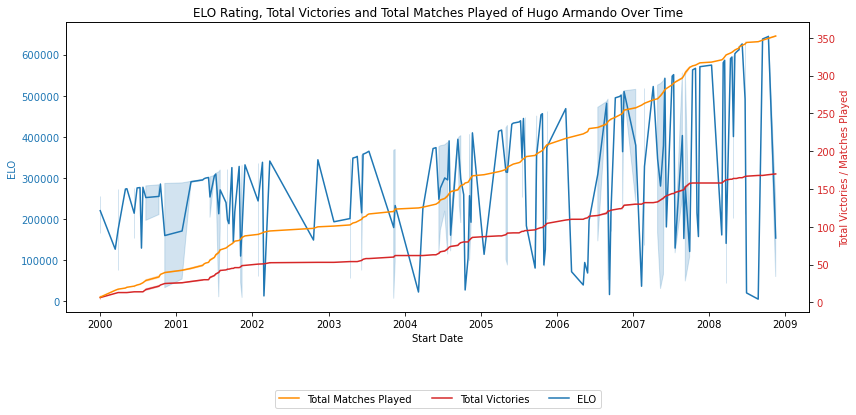

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the required columns
plot_data = pd.DataFrame()
plot_data['start_date'] = hugo_armando_rows['start_date']
plot_data['elo'] = hugo_armando_rows.apply(lambda row: row['elo_1'] if row['player_id'] == 'hugo-armando' else row['elo_2'], axis=1)
plot_data['total_matches_played'] = hugo_armando_rows.apply(lambda row: row['running_total_matches_played_1'] if row['player_id'] == 'hugo-armando' else row['running_total_matches_played_2'], axis=1)
plot_data['total_victories'] = hugo_armando_rows.apply(lambda row: row['running_total_victories_1'] if row['player_id'] == 'hugo-armando' else row['running_total_victories_2'], axis=1)

# Convert start_date to datetime object
plot_data['start_date'] = pd.to_datetime(plot_data['start_date'])

# Sort the DataFrame by start_date
plot_data = plot_data.sort_values(by='start_date')

# Create the plot with two y-axes for total victories and total matches played
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot the ELO rating
color1 = 'tab:blue'
sns.lineplot(data=plot_data, x='start_date', y='elo', ax=ax1, color=color1)
ax1.set_xlabel('Start Date')
ax1.set_ylabel('ELO', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Plot the total victories and total matches played
color2 = 'tab:red'
sns.lineplot(data=plot_data, x='start_date', y='total_victories', ax=ax2, color=color2, label='Total Victories')
sns.lineplot(data=plot_data, x='start_date', y='total_matches_played', ax=ax2, color='darkorange', label='Total Matches Played')
ax2.set_ylabel('Total Victories / Matches Played', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add a legend at the bottom of the plot
lines = [plt.Line2D([0], [0], color='darkorange'), plt.Line2D([0], [0], color=color2), plt.Line2D([0], [0], color=color1)]
labels = ['Total Matches Played', 'Total Victories', 'ELO']
plt.legend(lines, labels, bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=3)

# Set the title and show the plot
plt.title('ELO Rating, Total Victories and Total Matches Played of Hugo Armando Over Time')
fig.tight_layout()
plt.show()


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from helper_functions import print_elapsed_time

df = calculate_elo

# Assuming your dataframe is named df
print_elapsed_time('Sorting values')
df = df.sort_values(by='start_date', ascending=True)

# Function to get the ELO from the last match
def get_prior_elo(player_id, player_matches_played, date):
    last_match_rows = df[((df['player_id'] == player_id) & (df['running_total_matches_played_1'] == player_matches_played - 1)) | 
                         ((df['opponent_id'] == player_id) & (df['running_total_matches_played_2'] == player_matches_played - 1))]

    if last_match_rows.empty:
        return 1500

    last_match = last_match_rows.iloc[-1]

    if last_match['player_id'] == player_id:
        return last_match['elo_1']
    else:
        return last_match['elo_2']

print_elapsed_time('Getting prior ELO for player_id')
df['prior_elo_1'] = df.apply(lambda row: get_prior_elo(row['player_id'], row['running_total_matches_played_1'], row['start_date']), axis=1)
print_elapsed_time('Getting prior ELO for opponent_id')
df['prior_elo_2'] = df.apply(lambda row: get_prior_elo(row['opponent_id'], row['running_total_matches_played_2'], row['start_date']), axis=1)

# Calculate ELO differences and the outcome of the match (1 if player 1 wins, 0 if player 2 wins)
elo_diffs = []
outcomes = []

# Calculate ELO differences and the outcome of the match (1 if player 1 wins, 0 if player 2 wins)
print_elapsed_time('Calculating ELO Diff coming into match')
elo_diffs = df['prior_elo_1'] - df['prior_elo_2']
outcomes = df['player_victory_1']

# Prepare the data for logistic regression
print_elapsed_time('Creating X and y for Logistic Regression')
X = pd.DataFrame(elo_diffs, columns=['elo_diff'])
y = pd.Series(outcomes)

# Split the data into train and test sets
print_elapsed_time('Splitting the data')
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the logistic regression model
print_elapsed_time('Train the model')
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions and calculate the accuracy
print_elapsed_time('Make predictions')
y_pred = log_reg.predict(X_test)
print_elapsed_time('Test accuracy')
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Sorting values
	Elapsed time since last call: 1.81 minutes

Getting prior ELO for player_id
	Elapsed time since last call: 2.27 seconds


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
df = df.sort_values(by='start_date', ascending=True)

# Calculate ELO differences and the outcome of the match (1 if player 1 wins, 0 if player 2 wins)
elo_diffs = []
outcomes = []

for index, row in df.iterrows():
    elo_1 = get_last_elo(row['player_id'], row['start_date'], df)
    elo_2 = get_last_elo(row['opponent_id'], row['start_date'], df)
    elo_diffs.append(elo_1 - elo_2)
    outcomes.append(1 if row['player_victory_1'] else 0)

# Prepare the data for logistic regression
X = pd.DataFrame(elo_diffs, columns=['elo_diff'])
y = pd.Series(outcomes)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions and calculate the accuracy for different ELO difference ranges
elo_diff_ranges = np.arange(0, max(X['elo_diff']), 100)
accuracy_scores = []

for elo_diff_range in elo_diff_ranges:
    mask = (X_test['elo_diff'] >= elo_diff_range) & (X_test['elo_diff'] < elo_diff_range + 100)
    X_test_range = X_test[mask]
    y_test_range = y_test[mask.index]
    
    if len(X_test_range) > 0:
        y_pred_range = log_reg.predict(X_test_range)
        accuracy_range = accuracy_score(y_test_range, y_pred_range)
        accuracy_scores.append(accuracy_range)
    else:
        accuracy_scores.append(None)

# Plot the accuracy based on the ELO difference
plt.plot(elo_diff_ranges, accuracy_scores, marker='o')
plt.xlabel('ELO Difference')
plt.ylabel('Accuracy')
plt.title('Accuracy Based on ELO Difference')
plt.grid()
plt.show()
